<a href="https://colab.research.google.com/github/NataGoto/Bouquets_recommedation_system/blob/main/Bouquets%2Bpast_purchases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Система рекомендаций букетов #
Характеристики датасета - разреженный, за 9 месяцев,
имеются атрибуты заказчика - гендер, дата покупки
атрибуты букета - категория, название букета, стоимость букета, стоимость букета с доставкой.
## Пожелания.
## Желательные атрибуты букета - название цветов в букете - позволит выстроить систему для холодного старта, основанную на рекомендации букетов по сезону (круглый год и конкретный сезон)
## Введение системы отзывов с рейтингом букетов
В настоящий момкент построить систему для холодного старта затруднительно, при регистрации заказчик может получить только, к примеру, топ по продажам или топ по цене. Однако! топ по продажам это цветы по акции. Акция это категория, которая обрушивает систему рекомендаций, в ней же могут быть любые цветы, поэтому ее не нужно вводить в состав стандартных категорий, а ввести просто дополнительное разделение -акция и остальные. Дадее в топе по породажам категория собери букет, которая снята с продажи. По холодному старту нужно обсуждать.
Также предлагаю создать небольщую СУБД на сервере, и договориться заранее о формате датасета, который мы будем получать. Будет ли он всегда таким как его присылают или есть возможность 1)выровнять его, чтобы там не было строк NAN (сейчас на одного заказчика заполняются товары со строками нан в половине, где идут харакетеристики заказчика), а также включить колонки с метриками?


In [ ]:
# создаем файл для разметки букетов как таковых
import csv

# Данные для записи
data = [
    ['filename', 'заказчик', 'товар', 'категория', 'цена', 'цвет', 'обертка', 'оформление', 'сухоцвет'],
]

# Запись данных в CSV файл
with open('C:\\Users\\Admin\\Desktop\\Питон\\Рекомендации1\\Flowers_images_unique2\\bouquets_labels.csv', 'w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerows(data)


In [ ]:
import os
import pandas as pd

# Путь к директории с изображениями
directory = 'C:\\Users\\Admin\\Desktop\\Питон\\Рекомендации1\\Flowers_images_unique2'

# Получение списка всех файлов в директории
filenames = os.listdir(directory)

# Создание DataFrame
df = pd.DataFrame(filenames, columns=['filename'])

# Сохранение DataFrame в CSV файл
df.to_csv('C:\\Users\\Admin\\Desktop\\Питон\\Рекомендации1\\Flowers_images_unique2\\bouquets_labels.csv', index=False)


№	Оформлен	Заказчик	Пол	Тип заказа	Время доставки	Стоимость	Статус заказа	Товар	Название товара	Название категории	Ссылка на изображение	Стоимость товара	Количество

In [ ]:
# Маркетинговый анализ. Сколько покупок по категориям.
num_categories = bouquets['Название категории'].nunique()
print(f"Количество категорий: {num_categories}")


Количество категорий: 25


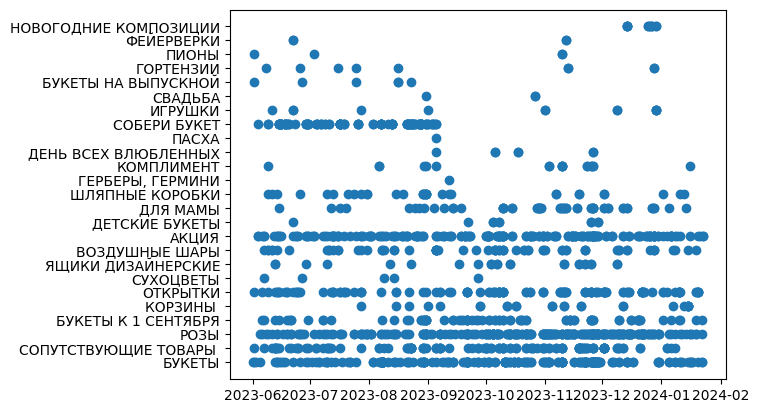

In [ ]:
bouquets['Оформлен'] = pd.to_datetime(bouquets['Оформлен'], format='%d.%m.%Y')
plt.scatter(bouquets['Оформлен'], bouquets['Название категории'])
plt.show()


По скаттеру видно, что помимо стандартной категории Букеты популярны:
Розы, сопутствующие товары, открытки, букеты к 1 сентября (продаются весь период датасета),акции, воздушные шары, букеты для мамы (по убывающей).
Были популярны собери букет, но полностью прекратились к сентябрю 2023. Из цветов менее всего популярны букеты для свадьбы, детские букеты, а также герберы-гермини, пионы и гортензии. Из букетов к праздникам более всего популярны к 1 сентября, менее всего популярны букеты к пасхе


In [ ]:
gender_category = bouquets.groupby(['Название категории', 'Пол']).size().unstack()
print(gender_category)
# мужчины покупают розы, букеты к 1 сенттября (потому что дешевые) и акции
# у женщин выраженных предпочтений нет, также популяирны розы, собери букет.
# Сопутствующие товары популярны открытки

Пол                    Женский  Мужской
Название категории                     
АКЦИЯ                     40.0    171.0
БУКЕТЫ                   152.0    167.0
БУКЕТЫ К 1 СЕНТЯБРЯ       21.0     66.0
БУКЕТЫ НА ВЫПУСКНОЙ        NaN      6.0
ВОЗДУШНЫЕ ШАРЫ            22.0     47.0
ГЕРБЕРЫ, ГЕРМИНИ           NaN      1.0
ГОРТЕНЗИИ                  4.0      5.0
ДЕНЬ ВСЕХ ВЛЮБЛЕННЫХ       NaN      7.0
ДЕТСКИЕ БУКЕТЫ             3.0      7.0
ДЛЯ МАМЫ                  23.0     34.0
ИГРУШКИ                    7.0      6.0
КОМПЛИМЕНТ                 3.0     16.0
КОРЗИНЫ                    6.0     20.0
НОВОГОДНИЕ КОМПОЗИЦИИ      8.0      4.0
ОТКРЫТКИ                  54.0     78.0
ПАСХА                      1.0      NaN
ПИОНЫ                      NaN      4.0
РОЗЫ                      64.0    223.0
СВАДЬБА                    NaN      3.0
СОБЕРИ БУКЕТ              66.0     58.0
СОПУТСТВУЮЩИЕ ТОВАРЫ      48.0     89.0
СУХОЦВЕТЫ                  3.0      2.0
ФЕЙЕРВЕРКИ                 2.0      2.0


In [ ]:
# анализ цены с сортировкой, можем выводить на холодный старт n-top самых дорогих
# Сортируем датафрейм по столбцу 'Стоимость товара' в порядке убывания и берем первые 10 строк
top_10_expensive = bouquets.sort_values('Стоимость товара', ascending=False).head(10)

# Сортируем датафрейм по столбцу 'Стоимость товара' в порядке возрастания и берем первые 10 строк
top_10_cheapest = bouquets.sort_values('Стоимость товара', ascending=True).head(10)

# Для букетов делаем то же самое, но сначала фильтруем датафрейм по категории 'букеты'
bouquets_only = bouquets[bouquets['Название категории'] == 'БУКЕТЫ']
top_10_expensive_bouquets = bouquets_only.sort_values('Стоимость товара', ascending=False).head(10)
top_10_cheapest_bouquets = bouquets_only.sort_values('Стоимость товара', ascending=True).head(10)


print("10 самых дорогих товаров:")
print(top_10_expensive[['Название товара', 'Товар', 'Стоимость', 'Стоимость товара']])

print("\n10 самых дешевых товаров:")
print(top_10_cheapest[['Название товара', 'Товар', 'Стоимость', 'Стоимость товара']])

print("\n10 самых дорогих букетов:")
print(top_10_expensive_bouquets[['Название товара', 'Товар', 'Стоимость', 'Стоимость товара']])

print("\n10 самых дешевых букетов:")
print(top_10_cheapest_bouquets[['Название товара', 'Товар', 'Стоимость', 'Стоимость товара']])

# Сохраняем отсортированный датафрейм в новый csv файл
sorted_bouquets.to_csv(r'C:\\Users\\Admin\\Desktop\\Питон\\Рекомендации1\\Flowers_images_unique2\\price_sorted_bouquets.csv', index=False)

10 самых дорогих товаров:
                   Название товара     Товар  Стоимость  Стоимость товара
782          История одной страсти  129346.0    24365.0           24365.0
1337                   Калейдоскоп    6905.0    22160.0           22160.0
943                    Калейдоскоп    6905.0    22160.0           22160.0
807                           Люкс    1295.0    15820.0           14110.0
935               Глубокие чувства    6902.0    11610.0           11610.0
1329              Глубокие чувства    6902.0    11610.0           11610.0
734                Сказочный букет    6895.0    10845.0           10845.0
939   Роза Кения микс 101 шт Акция  129806.0    13432.0            9685.0
1504  Роза Кения микс 101 шт Акция  129806.0     9720.0            9685.0
26    Роза Кения микс 101 шт Акция  129806.0     9685.0            9685.0

10 самых дешевых товаров:
               Название товара     Товар  Стоимость  Стоимость товара
1214  Открытка подарочная мини  127645.0     2285.0            

Название категории
БУКЕТЫ                   319
РОЗЫ                     287
АКЦИЯ                    211
СОПУТСТВУЮЩИЕ ТОВАРЫ     137
ОТКРЫТКИ                 132
СОБЕРИ БУКЕТ             124
БУКЕТЫ К 1 СЕНТЯБРЯ       87
ВОЗДУШНЫЕ ШАРЫ            69
ДЛЯ МАМЫ                  57
ШЛЯПНЫЕ КОРОБКИ           33
КОРЗИНЫ                   26
ЯЩИКИ ДИЗАЙНЕРСКИЕ        24
КОМПЛИМЕНТ                19
ИГРУШКИ                   13
НОВОГОДНИЕ КОМПОЗИЦИИ     12
ДЕТСКИЕ БУКЕТЫ            10
ГОРТЕНЗИИ                  9
ДЕНЬ ВСЕХ ВЛЮБЛЕННЫХ       7
БУКЕТЫ НА ВЫПУСКНОЙ        6
СУХОЦВЕТЫ                  5
ПИОНЫ                      4
ФЕЙЕРВЕРКИ                 4
СВАДЬБА                    3
ГЕРБЕРЫ, ГЕРМИНИ           1
ПАСХА                      1
Name: count, dtype: int64


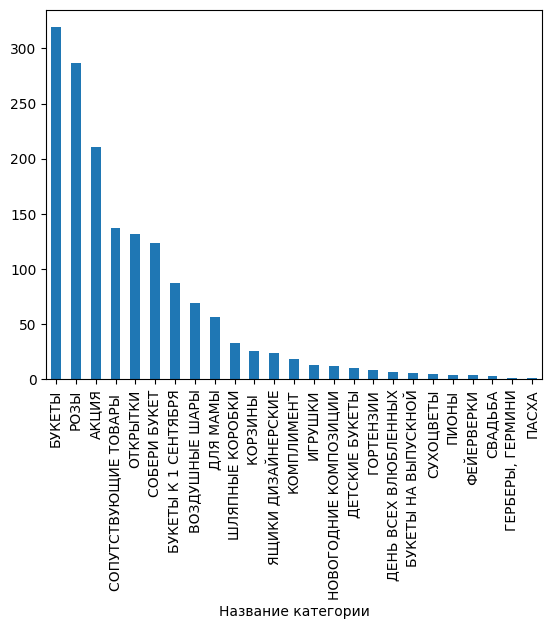

In [ ]:
#Количество покупок в категории
category_purchases = bouquets['Название категории'].value_counts()
print(category_purchases)
category_purchases.plot(kind='bar')
plt.show()

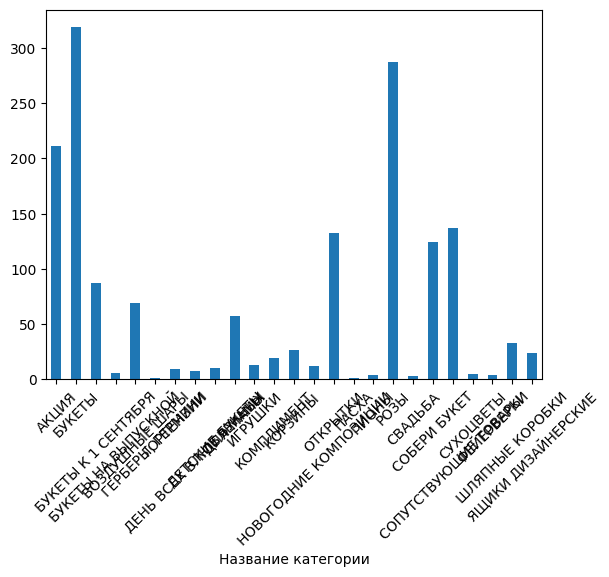

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных из CSV файлов
bouquets = pd.read_csv(r'C:/Users/Admin/Desktop/Питон/Рекомендации1/Flowers_images_unique2/bouquets_labels.csv')


bouquets['Время доставки'] = pd.to_datetime(bouquets['Время доставки'], format='%d.%m.%Y')

bouquets['Время доставки'].groupby(bouquets['Название категории']).count().plot(kind='bar')
plt.xticks(rotation=45)
plt.show()


In [ ]:
import os
from PIL import Image
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
# Путь к папке с изображениями
images_path = r'C:\\Users\\Admin\\Desktop\\Питон\\Рекомендации1\\Flowers_images_unique2'

# Создаем DataFrame для хранения результатов
df_bouquets = pd.DataFrame(columns=['file', 'dominant_colors_rgb', 'dominant_colors_name', 'color_intensity'])

# Функция для определения преобладающих цветов
def get_dominant_colors(image_path, num_colors=4):
    # Загружаем изображение
    image = Image.open(image_path)
    # Преобразуем в массив numpy
    np_image = np.array(image)
    # Изменяем форму массива в список пикселей
    pixels = np_image.reshape((-1, 3))

    # Используем KMeans для нахождения преобладающих цветов
    kmeans = KMeans(n_clusters=3, n_init=10)
    kmeans.fit(pixels)

    # Центры кластеров являются преобладающими цветами
    dominant_colors = kmeans.cluster_centers_.astype(int)

    return dominant_colors

# Функция для определения интенсивности цвета
def get_color_intensity(rgb_values):
    # Оценка интенсивности может быть основана на среднем значении каналов RGB
    return np.mean(rgb_values)

# Создаем пустой список для хранения данных о каждом изображении
bouquets_data = []

# Обходим все файлы в папке с изображениями
for file in os.listdir(images_path):
    if file.endswith(('.jpg', '.png')):
        file_path = os.path.join(images_path, file)
        try:
            # Получаем преобладающие цвета
            dominant_colors = get_dominant_colors(file_path)
            # Получаем интенсивности цветов
            color_intensities = [get_color_intensity(color) for color in dominant_colors]

            # Добавляем данные о букете в список
            bouquets_data.append({
                'file': file,
                'dominant_colors_rgb': dominant_colors.tolist(),
                'color_intensity': color_intensities
            })
        except Exception as e:
            print(f"Error processing file {file}: {e}")

# Преобразуем список словарей в DataFrame
df_bouquets = pd.DataFrame(bouquets_data)

# Сохраняем результаты в CSV
df_bouquets.to_csv('C:\\Users\\Admin\\Desktop\\Питон\\Рекомендации1\\Flowers_images_unique2\\bouquets_color.csv', index=False)


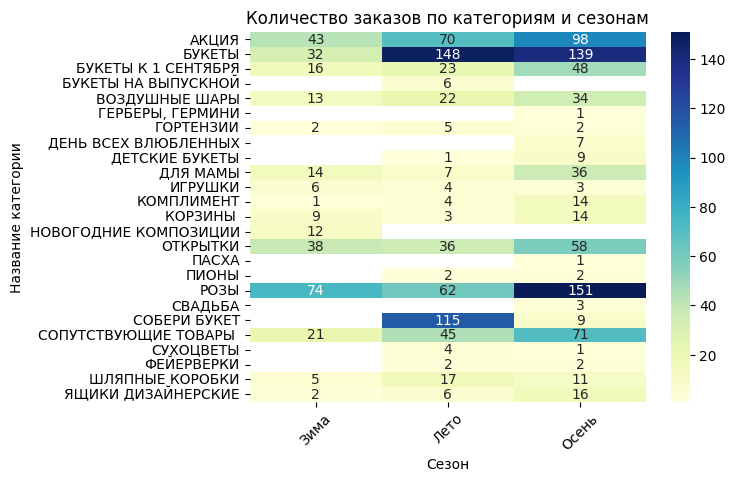

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Загрузка данных
bouquets = pd.read_csv(r'C:/Users/Admin/Desktop/Питон/Рекомендации1/Flowers_images_unique2/bouquets_labels.csv')
bouquets['Время доставки'] = pd.to_datetime(bouquets['Время доставки'], format='%d.%m.%Y')

# Определение функции для определения сезона по месяцу
def get_season(month):
    if month in [12, 1, 2]:
        return 'Зима'
    elif month in [3, 4, 5]:
        return 'Весна'
    elif month in [6, 7, 8]:
        return 'Лето'
    else:
        return 'Осень'

# Применение функции к DataFrame для создания столбца 'Сезон'
bouquets['Сезон'] = bouquets['Время доставки'].apply(lambda x: get_season(x.month))

# Группировка данных по сезонам и категориям и подсчет количества заказов
seasonal_counts = bouquets.groupby(['Сезон', 'Название категории']).size().reset_index(name='Количество')

# Визуализация данных с помощью тепловой карты
pivot_table = seasonal_counts.pivot_table(index='Название категории', columns='Сезон', values='Количество')

sns.heatmap(pivot_table, cmap="YlGnBu", annot=True, fmt=".0f")
plt.title('Количество заказов по категориям и сезонам')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Код для определения доминирующих цветов букета 70% от центра изображения и занесение в csv - автоматизация еженедельного апдейта
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
from PIL import Image
import os
import warnings

# Отключаем предупреждения
warnings.filterwarnings('ignore', category=FutureWarning)
import ast

colors = {
        (255, 0, 0): 'Красный',
        (255, 255, 255): 'Белый',
        (245, 245, 220): 'Бежевый',
        (240, 220, 130): 'Песочный',
        (238, 220, 130): 'Чайный',
        (255, 192, 203): 'Розовый',
        (255, 182, 193): 'Бледно-розовый',
        (253, 245, 230): 'Молочно-белый',
        (128, 0, 0): 'Бордовый',
        (227, 11, 93): 'Малиновый',
        (173, 216, 230): 'Голубой',
        (0, 255, 0): 'Зеленый',
        (0, 0, 255): 'Синий',
        (255, 255, 0): 'Желтый',
        (0, 255, 255): 'Голубой',
        (255, 0, 255): 'Фуксия',
        (128, 128, 0): 'Оливковый',
        (0, 128, 0): 'Темно-зеленый',
        (128, 0, 128): 'Пурпурный',
        (0, 128, 128): 'Бирюзовый',
        (0, 0, 128): 'Темно-синий',
        (255, 165, 0): 'Оранжевый',
         }
# Функция для перевода RGB в название цвета использует глобальный словарь
def rgb_to_color_name(rgb):
    closest_colors = min(colors.keys(), key=lambda color: sum((s - q) ** 2 for s, q in zip(color, rgb)))
    return colors.get(closest_colors, 'Неизвестный')


# Функция для определения доминирующих цветов
def get_dominant_colors(image_data, n_colors=3):
    pixels = np.array(image_data)
    pixels = pixels.reshape((-1, 3))
    kmeans = KMeans(n_clusters=n_colors, n_init=1, max_iter=100)
    kmeans.fit(pixels)
    return kmeans.cluster_centers_

# Функция для обработки изображения и определения доминирующих цветов
def process_image(file_path, n_colors=3):
    image = Image.open(file_path)
    image = image.convert('RGB')
    dominant_colors = get_dominant_colors(image, n_colors=n_colors)
    return dominant_colors

# Путь к папке с изображениями
image_dir = r'C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images_unique2'

# Получение списка файлов изображений
image_files = [file for file in os.listdir(image_dir) if file.endswith(('.jpg', '.png'))]

# Список для результатов
results = []

# Обработка каждого файла
for file in image_files:
    file_path = os.path.join(image_dir, file)
    try:
        dominant_colors = process_image(file_path, n_colors=5)
        color_names = [rgb_to_color_name(tuple(map(int, color))) for color in dominant_colors]
        result = {'filename': file}
        # Добавляем цвета и их названия в словарь
        for i, color in enumerate(dominant_colors):
            result[f'color{i+1}'] = color.tolist()  # Цвета в формате RGB
            result[f'color_name{i+1}'] = color_names[i]  # Названия цветов на русском
        results.append(result)
    except Exception as e:
        print(f"Error processing file {file}: {e}")

# Создание DataFrame и сохранение в CSV
df_results = pd.DataFrame(results)
csv_output_path = 'C:\\Users\\Admin\\Desktop\\Питон\\Рекомендации1\\Flowers_images_unique2\\colors_trial.csv'
df_results.to_csv(csv_output_path, index=False)

df_results.head()  # Показать первые несколько строк DataFrame для проверки

,filename,color1,color_name1,color2,color_name2,color3,color_name3,color4,color_name4,color5,color_name5
0,100284_127723.jpg,"[252.24610081282893, 201.24350698732917, 226.6...",Розовый,"[24.615121882441514, 20.579474157105807, 26.77...",Темно-синий,"[192.40947859573558, 83.7990392213356, 111.303...",Малиновый,"[231.94867999258116, 141.17777211366868, 163.7...",Бледно-розовый,"[99.70428276621044, 100.2864816434657, 105.561...",Бирюзовый
1,100938_127807.jpg,"[35.48674129054747, 167.83727403327856, 119.23...",Бирюзовый,"[213.13433772272543, 193.64223026483336, 56.94...",Оранжевый,"[31.073916775014354, 36.396910325932495, 24.01...",Темно-зеленый,"[126.93965203036369, 117.98537798551149, 92.17...",Оливковый,"[227.91796727082334, 217.9960137548905, 130.34...",Чайный
2,100938_34617.jpg,"[83.85475109589811, 80.90555809621071, 83.6847...",Пурпурный,"[226.92542145642147, 201.4287558657, 201.62196...",Розовый,"[13.763072438454884, 13.494834642151517, 13.90...",Бордовый,"[91.61985437524999, 106.67895592250703, 119.84...",Бирюзовый,"[194.946999195842, 131.48610699622822, 131.576...",Чайный
3,100938_69925.jpg,"[221.6674681200691, 176.5822098208283, 153.805...",Чайный,"[34.00623972886984, 28.888711996726514, 17.199...",Бордовый,"[176.30886213550065, 138.6192841807675, 116.90...",Чайный,"[229.43045319919625, 213.16734473733828, 200.2...",Розовый,"[119.41466533859682, 88.40437279422233, 60.201...",Оливковый
4,101231_129804.jpg,"[192.14501710474482, 10.064990919695191, 39.64...",Малиновый,"[223.55289298848072, 206.77569502675, 209.3906...",Розовый,"[54.63968167368742, 18.093767049821437, 22.330...",Бордовый,"[180.68716281257286, 152.8902811667346, 158.93...",Бледно-розовый,"[122.22440413466819, 19.79043181735696, 35.409...",Бордовый


In [ ]:
# Цвета не соответствуют гамме цуветочных букетов. Сделаем другой словарь.
# Чтобы не захватывал изображения людей и обертки,
# код для определения доминирующих цветов букета 70% от центра изображения и занесение в csv - автоматизация еженедельного апдейта
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
from PIL import Image
import os
import warnings

# Отключаем предупреждения
warnings.filterwarnings('ignore', category=FutureWarning)
import ast

colors = {
        (255, 0, 0): 'Красный',
        (255, 255, 255): 'Белый',
        (245, 245, 220): 'Бежевый',
        (240, 220, 130): 'Песочный',
        (238, 220, 130): 'Чайный',
        (255, 192, 203): 'Розовый',
        (255, 182, 193): 'Бледно-розовый',
        (253, 245, 230): 'Молочно-белый',
        (128, 0, 0): 'Бордовый',
        (227, 11, 93): 'Малиновый',
        (173, 216, 230): 'Голубой',
        (0, 255, 0): 'Зеленый',
        (0, 0, 255): 'Синий',
        (255, 255, 0): 'Желтый',
        (0, 255, 255): 'Голубой2',
        (255, 0, 255): 'Фуксия',
        (128, 128, 0): 'Оливковый',
        (0, 128, 0): 'Темно-зеленый',
        (128, 0, 128): 'Пурпурный',
        (0, 128, 128): 'Бирюзовый',
        (0, 0, 128): 'Темно-синий',
        (239, 169, 74): 'Пастельно-желтый',
        (127, 181, 181): 'Пастельно-бирюзовый',
        (93, 155, 155): 'Пастельно-синий',
        (161, 133, 148): 'Пастельно-фиолетовый',
        (119, 221, 119): 'Пастельно-зеленый',
        (255, 117, 20): 'Пастельно-оранжевый',
        (255, 140, 105): 'Лососевый',
        (255, 155, 170): 'Лососевый Крайола',
        (255, 178, 139): 'Светлый желто-розовый',
        (252, 232, 131): 'Желтый Крайола',
        (190, 189, 127): 'Зелено-бежевый',
        (198, 223, 144): 'Очень светлый желто-зеленый',
        (153, 255, 153): 'Салатовый',
        (175, 218, 252): 'Синий-синий иней',
        (230, 230, 250): 'Лавандовый',
        (255,209,220): 'Пастельно-розовый',
        (255, 165, 0): 'Оранжевый',
        (202, 1, 71): 'Рубиновый',
        (155, 45, 48): 'Бордовый',
        (243, 71, 35): 'Гранатовый',
        (144, 0, 32): 'Бургундский',
        (72, 6, 7): 'Болгарская роза',
        (169, 32, 62): 'Глубокий карминный',
        (145, 30, 66): 'Вишневый',
        (150, 0, 24): 'Кармин',
        (179, 40, 33): 'Кораллово-красный',
        (213, 113, 63): 'Ванильный',
        (100, 19, 73): 'Глубокий красно-пурпурный',
        (123, 0, 28): 'Глубокий красный',
        (255, 255, 153): 'Канареечный',
        (228, 113, 122): 'Карамельно-розовый',
        (213, 48, 50): 'Клубнично-красный',
        (218, 112, 214): 'Орхидея',
        (204, 119, 34): 'Охра',
        (176, 224, 230): 'Пыльный голубой',
        (222, 49, 99): 'Светлая вишня',
        (204, 78, 92): 'Терракота',
        (138, 43, 226): 'Сине-лиловый',
        (102, 0, 102): 'Сливовый',
        (17, 96, 98): 'Темно-бирюзовый',
        (234, 141, 247): 'Фиалковый'
         }

# Функция для перевода RGB в название цвета использует глобальный словарь
def rgb_to_color_name(rgb):
    closest_colors = min(colors.keys(), key=lambda color: sum((s - q) ** 2 for s, q in zip(color, rgb)))
    return colors.get(closest_colors, 'Неизвестный')


# Функция для определения доминирующих цветов
def get_dominant_colors(image_data, n_colors=3):
    pixels = np.array(image_data)
    pixels = pixels.reshape((-1, 3))
    kmeans = KMeans(n_clusters=n_colors, n_init=1, max_iter=100)
    kmeans.fit(pixels)
    return kmeans.cluster_centers_

# Функция для обработки изображения и определения доминирующих цветов
def process_image(file_path, n_colors=3):
    image = Image.open(file_path)
    image = image.convert('RGB')
    dominant_colors = get_dominant_colors(image, n_colors=n_colors)
    return dominant_colors

# Путь к папке с изображениями
image_dir = r'C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images_unique2'

# Получение списка файлов изображений
image_files = [file for file in os.listdir(image_dir) if file.endswith(('.jpg', '.png'))]

# Список для результатов
results = []

# Обработка каждого файла
for file in image_files:
    file_path = os.path.join(image_dir, file)
    try:
        dominant_colors = process_image(file_path, n_colors=5)
        color_names = [rgb_to_color_name(tuple(map(int, color))) for color in dominant_colors]
        result = {'filename': file}
        # Добавляем цвета и их названия в словарь
        for i, color in enumerate(dominant_colors):
            result[f'color{i+1}'] = color.tolist()  # Цвета в формате RGB
            result[f'color_name{i+1}'] = color_names[i]  # Названия цветов на русском
        results.append(result)
    except Exception as e:
        print(f"Error processing file {file}: {e}")

# Создание DataFrame и сохранение в CSV
df_results = pd.DataFrame(results)
csv_output_path = r'C:\\Users\\Admin\\Desktop\\Питон\\Рекомендации1\\Flowers_images_unique2\\colors_trial2.csv'
df_results.to_csv(csv_output_path, index=False)

df_results.head()  # Показать первые несколько строк DataFrame для проверки


,filename,color1,color_name1,color2,color_name2,color3,color_name3,color4,color_name4,color5,color_name5
0,100284_127723.jpg,"[24.65162817975923, 20.572850557855517, 26.785...",Болгарская роза,"[233.81406620409655, 143.0971178485974, 166.83...",Лососевый Крайола,"[99.750586418871, 100.24703821372134, 105.5265...",Пастельно-синий,"[192.81777387095022, 84.68754034066832, 111.84...",Терракота,"[252.32117241873078, 203.09361241307033, 227.9...",Пастельно-розовый
1,100938_127807.jpg,"[68.01749499289001, 90.14588887562135, 51.6702...",Темно-бирюзовый,"[228.54653081077353, 218.6107548125808, 129.14...",Чайный,"[119.90201071110803, 129.9556837704879, 104.95...",Пастельно-фиолетовый,"[25.372706175111958, 27.873854582907114, 20.17...",Болгарская роза,"[210.56608326434298, 190.83586880023438, 55.78...",Пастельно-желтый
2,100938_34617.jpg,"[165.27705887394498, 81.55494615362322, 84.646...",Терракота,"[227.93494157478187, 203.3888116490283, 203.89...",Розовый,"[85.46193980472081, 99.49397331807091, 109.732...",Темно-бирюзовый,"[14.651693054978892, 14.087282238173202, 14.32...",Болгарская роза,"[198.7426913761122, 146.94335605249205, 145.39...",Пастельно-фиолетовый
3,100938_69925.jpg,"[221.66854489487892, 176.58121250063397, 153.8...",Светлый желто-розовый,"[34.05940962251509, 28.931396183845848, 17.217...",Болгарская роза,"[176.3275517918432, 138.6533794551238, 116.941...",Пастельно-фиолетовый,"[119.54694238637659, 88.47028395196962, 60.278...",Бордовый,"[229.43219834682023, 213.16517122429815, 200.2...",Пастельно-розовый
4,101231_129804.jpg,"[193.1563131624318, 10.043995450477041, 39.765...",Кораллово-красный,"[223.58854651165478, 206.82124031005847, 209.4...",Пастельно-розовый,"[55.9400560731045, 18.42585692320013, 22.74098...",Болгарская роза,"[180.69837597381095, 152.91396461342367, 158.9...",Пастельно-фиолетовый,"[123.92873024815867, 19.388076250315933, 35.46...",Глубокий красный


**Мы получаем цвета букета теперь автоматически. На сервере данная операция может не производиться.**


In [ ]:
# Сохранение обновленного датасета в новый CSV-файл
df_results.to_csv(r'C:\\Users\\Admin\\Desktop\\Питон\\Рекомендации1\\Flowers_images_unique2\\colors_trial3.csv', index=False)

In [ ]:
# один из вариантов визуального сходства букетов это сходство по цвету

def classify_color_features(color_names):
    features = {
        'monochrome': False,
        'polychrome': False,
        'bright': False,
        'light': False,
        'contrast': False,
        'luxury': False,  # Для дорогих букетов
        'budget': False,  # Для бюджетных букетов
    }

    unique_colors = set(color_names)
    features['monochrome'] = len(unique_colors) == 1
    features['polychrome'] = len(unique_colors) > 2

    # Определение яркости и контрастности
    bright_colors = {
        (255, 0, 0): 'Красный',
        (128, 0, 0): 'Бордовый',
        (227, 11, 93): 'Малиновый',
        (0, 255, 0): 'Зеленый',
        (0, 0, 255): 'Синий',
        (255, 255, 0): 'Желтый',
        (255, 0, 255): 'Фуксия',
        (128, 0, 128): 'Пурпурный',
        (0, 128, 128): 'Бирюзовый',
        (0, 0, 128): 'Темно-синий',
        (255, 165, 0): 'Оранжевый',
        (202, 1, 71): 'Рубиновый',
        (155, 45, 48): 'Бордовый',
        (243, 71, 35): 'Гранатовый',
        (144, 0, 32): 'Бургундский',
        (72, 6, 7): 'Болгарская роза',
        (169, 32, 62): 'Глубокий карминный',
        (145, 30, 66): 'Вишневый',
        (150, 0, 24): 'Кармин',
        (179, 40, 33): 'Кораллово-красный',
        (213, 113, 63): 'Ванильный',
        (100, 19, 73): 'Глубокий красно-пурпурный',
        (123, 0, 28): 'Глубокий красный',
        (255, 255, 153): 'Канареечный',
        (213, 48, 50): 'Клубнично-красный',
        (218, 112, 214): 'Орхидея',
        (204, 119, 34): 'Охра',
        (176, 224, 230): 'Пыльный голубой',
        (222, 49, 99): 'Светлая вишня',
        (204, 78, 92): 'Терракота',
        (138, 43, 226): 'Сине-лиловый',
        (102, 0, 102): 'Сливовый',
        (17, 96, 98): 'Темно-бирюзовый',
        (234, 141, 247): 'Фиалковый'}
    light_colors = {
        (255, 255, 255): 'Белый',
        (245, 245, 220): 'Бежевый',
        (240, 220, 130): 'Песочный',
        (238, 220, 130): 'Чайный',
        (255, 192, 203): 'Розовый',
        (255, 182, 193): 'Бледно-розовый',
        (253, 245, 230): 'Молочно-белый',
        (173, 216, 230): 'Голубой',
        (0, 255, 255): 'Голубой2',
        (239, 169, 74): 'Пастельно-желтый',
        (127, 181, 181): 'Пастельно-бирюзовый',
        (93, 155, 155): 'Пастельно-синий',
        (161, 133, 148): 'Пастельно-фиолетовый',
        (119, 221, 119): 'Пастельно-зеленый',
        (255, 117, 20): 'Пастельно-оранжевый',
        (255, 140, 105): 'Лососевый',
        (255, 155, 170): 'Лососевый Крайола',
        (255, 178, 139): 'Светлый желто-розовый',
        (252, 232, 131): 'Желтый Крайола',
        (190, 189, 127): 'Зелено-бежевый',
        (198, 223, 144): 'Очень светлый желто-зеленый',
        (153, 255, 153): 'Салатовый',
        (175, 218, 252): 'Синий-синий иней',
        (230, 230, 250): 'Лавандовый',
        (255,209,220): 'Пастельно-розовый',
        (213, 113, 63): 'Ванильный',
        (228, 113, 122): 'Карамельно-розовый',
        (176, 224, 230): 'Пыльный голубой'
    }

      # Определение ярких и светлых цветов
    bright_count = sum(color in bright_colors for color in color_names)
    light_count = sum(color in light_colors for color in color_names)

    features['bright'] = bright_count > 2
    features['light'] = light_count > 2

    # Контрастность определяется наличием как минимум одного яркого и одного светлого цвета
    features['contrast'] = bright_count > 0 and light_count > 0

    # Дорогие и бюджетные букеты
    if 'Красный' in color_names:
        features['luxury'] = True

    if 'Оранжевый' in color_names:
        features['budget'] = True

    return features

# Загрузка данных из исходного файла
df = pd.read_csv(r'C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images_unique2\colors_trial_with_results.csv')

# Применение функции classify_color_features к каждой строке DataFrame
df_styles = df.apply(lambda row: classify_color_features([row[f'color_name{i}'] for i in range(1, 6) if row[f'color_name{i}'] is not np.nan]), axis=1, result_type='expand')

# Добавление результатов анализа к исходному DataFrame
df_combined = pd.concat([df, df_styles], axis=1)

# Сохранение в новый CSV-файл
output_file_path = r'C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images_unique2\colors_trial_with_styles.csv'
df_combined.to_csv(output_file_path, index=False)

print("Файл успешно сохранен:", output_file_path)

df_combined = pd.read_csv(r'C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images_unique2\colors_trial_with_styles.csv')

# Вывод первых нескольких строк для проверки
print(df_combined.head())


Файл успешно сохранен: C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images_unique2\colors_trial_with_styles.csv
            filename                                             color1  \
0  100284_127723.jpg  [249.74743227200668, 188.69599813925646, 213.8...   
1  100938_127807.jpg  [127.00632012308368, 118.04413901054912, 92.24...   
2   100938_34617.jpg  [183.16842772897843, 117.64172840505896, 119.3...   
3   100938_69925.jpg  [229.47415648239905, 212.47364411198976, 199.1...   
4  101231_129804.jpg  [122.97416399885964, 19.57786601493015, 35.411...   

            color_name1                                             color2  \
0               Розовый  [94.98168614800025, 84.24532356920287, 87.6411...   
1  Пастельно-фиолетовый  [227.82114111875268, 217.81849180530278, 129.7...   
2  Пастельно-фиолетовый  [14.979908156904216, 14.084554337469015, 14.35...   
3               Розовый  [118.22565326601784, 87.70513990076299, 59.488...   
4      Глубокий красный  [223.90555362973

**Реализация автоматизированного отнесения к стилю пошла не очень хорошо, так как, несмотря на ограничение 70%, захватываются края фотографий, обертка. Тем не менее, мы можем попробовать установить сходство прямо по доминирующим  цветам букетов. в перспективе можно уточнить фотографии или сделать семантическую разметку, и тогда этот подход будет работать. Пробуем сейчас сходство по цветам.**

In [ ]:
# повторные покупатели
import pandas as pd

# Загрузка данных о заказах
orders_df = pd.read_csv(r'C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images_unique2\orders7.csv')

# Преобразование столбца с датами в формат datetime, указывая, что день идет первым
orders_df['Оформлен'] = pd.to_datetime(orders_df['Оформлен'], format='%d.%m.%Y', dayfirst=True)

# Группировка данных по 'Заказчик', 'Товар', и 'Дата покупки' и подсчёт количества покупок
customer_purchase_counts = orders_df.groupby(['Заказчик', 'Товар', 'Оформлен']).size().groupby('Заказчик').size()

# Определение повторных покупателей (тех, кто совершил более одной покупки)
regular_customers = customer_purchase_counts[customer_purchase_counts > 1]
# Преобразование столбца с датами в формат datetime
orders_df['Оформлен'] = pd.to_datetime(orders_df['Оформлен'])

# Создание DataFrame с данными о повторных покупателях и количестве их покупок
regular_customers_df = regular_customers.reset_index(name='Количество покупок')

# Сортировка по количеству покупок
regular_customers_df = regular_customers_df.sort_values('Количество покупок', ascending=False)

# Сохранение списка повторных покупателей и количества их уникальных товаров в CSV
unique_product_counts_df.to_csv(r'C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images_unique2\regular_customers.csv')

# Вывод первых строк для проверки
print(regular_customers_df.head())



     Заказчик  Количество покупок
106  539563.0                  14
36   139870.0                  14
123  617466.0                  12
103  529928.0                  11
4      4843.0                  11


In [ ]:
# Создадим файл только по повторным заказчикам

orders_df = pd.read_csv("C:/Users/Admin/Desktop/Питон/Рекомендации1/Flowers_images_unique2/orders7.csv")

# Загрузка данных о повторных заказчиках
regular_customers_df = pd.read_csv("C:/Users/Admin/Desktop/Питон/Рекомендации1/Flowers_images_unique2/regular_customers.csv")

# Преобразование 'Заказчик' в строковый тип, если он числовой
orders_df['Заказчик'] = orders_df['Заказчик'].astype(str)
regular_customers_df['Заказчик'] = regular_customers_df['Заказчик'].astype(str)

# Фильтрация orders_df, чтобы оставить только те строки, где 'Заказчик' присутствует в regular_customers_df
filtered_orders_df = orders_df[orders_df['Заказчик'].isin(regular_customers_df['Заказчик'])]

# Сохранение отфильтрованных данных в новый CSV-файл
filtered_orders_df.to_csv("C:/Users/Admin/Desktop/Питон/Рекомендации1/Flowers_images_unique2/filtered_orders_for_regular_customers.csv", index=False)


In [ ]:
# добавим в файл также стоимость общего чека повторного заказчика.
# Загрузка отфильтрованных данных о заказах
filtered_orders_df = pd.read_csv("C:/Users/Admin/Desktop/Питон/Рекомендации1/Flowers_images_unique2/filtered_orders_for_regular_customers.csv")

# Загрузка данных о повторных заказчиках
regular_customers_df = pd.read_csv("C:/Users/Admin/Desktop/Питон/Рекомендации1/Flowers_images_unique2/regular_customers.csv")

# Объединение данных о повторных заказчиках с отфильтрованными заказами
merged_df = pd.merge(filtered_orders_df, regular_customers_df, on='Заказчик', how='left')

# Предположим, что у нас есть колонка 'Сумма' в filtered_orders_df, содержащая стоимость каждого заказа
# Расчет общего чека для каждого заказчика
total_spent = merged_df.groupby('Заказчик')['Стоимость'].sum().reset_index(name='Общий чек')

# Объединение данных о общем чеке с основным DataFrame
merged_df = pd.merge(merged_df, total_spent, on='Заказчик', how='left')

# Сохранение итогового DataFrame в новый CSV-файл
merged_df.to_csv("C:/Users/Admin/Desktop/Питон/Рекомендации1/Flowers_images_unique2/regular_customers_detailed.csv", index=False)


In [ ]:
# Сортировка DataFrame по 'Общий чек' в порядке убывания
merged_df_sorted = merged_df.sort_values('Общий чек', ascending=False)

# Сохранение отсортированного DataFrame в новый CSV-файл
merged_df_sorted.to_csv("C:/Users/Admin/Desktop/Питон/Рекомендации1/Flowers_images_unique2/regular_customers_detailed_sorted.csv", index=False)
merged_df_sorted.head()

,№,Оформлен,Заказчик,Пол,Тип заказа,Время доставки,Стоимость,Статус заказа,Товар,Название товара,Название категории,Ссылка на изображение,Стоимость товара,Количество,Unnamed: 0,Количество уникальных товаров,Общий чек
272,64230.0,14.06.2023,3246.0,Мужской,Доставка,15.06.2023,11360.0,В работе,129321.0,Роза Candlelight,РОЗЫ,http://admin2.onedelivery.su/slim/tmp2/62938c0...,3375.0,1.0,1,10,79302.0
294,67582.0,20.01.2024,3246.0,Мужской,Доставка,20.01.2024,5124.0,В работе,128807.0,Пудровые облака,БУКЕТЫ,http://admin2.onedelivery.su/slim/tmp2/623d6eb...,5124.0,1.0,1,10,79302.0
202,64809.0,16.07.2023,3246.0,Мужской,Доставка,17.07.2023,3895.0,В работе,18775.0,Шар С рождением! 30см,ВОЗДУШНЫЕ ШАРЫ,http://admin2.onedelivery.su/slim/tmp2/61fd25f...,130.0,10.0,1,10,79302.0
201,64809.0,16.07.2023,3246.0,Мужской,Доставка,17.07.2023,3895.0,В работе,127807.0,Свежесть полей,АКЦИЯ,http://admin2.onedelivery.su/slim/tmp2/6281f71...,2245.0,1.0,1,10,79302.0
363,66804.0,26.11.2023,3246.0,Мужской,Доставка,26.11.2023,3005.0,В работе,128794.0,Лепесток,КОМПЛИМЕНТ,http://admin2.onedelivery.su/slim/tmp2/623d65c...,2605.0,1.0,1,10,79302.0


**Отметим важное! Без изображений сходство покупателей и товаров а данном случае искать нецелесообразно. Так как атрибуты для сравнения остаются только числовые идентификаторы и название категорий. Возьмем несколько категорий для логики сравнения по категории, но как общую логику ее применять не будем. Не все категории позволяют сравнивать.**

In [ ]:
# Какие же категории нам позволяют сравнивать?
df = pd.read_csv("C:/Users/Admin/Desktop/Питон/Рекомендации1/Flowers_images_unique2/regular_customers_detailed.csv")

# Вывод уникальных категорий товаров
unique_categories = df['Название категории'].unique()
print("Уникальные категории товаров:", unique_categories)


Уникальные категории товаров: ['БУКЕТЫ' 'СУХОЦВЕТЫ' 'БУКЕТЫ К 1 СЕНТЯБРЯ' 'РОЗЫ' 'СОПУТСТВУЮЩИЕ ТОВАРЫ '
 'АКЦИЯ' 'ОТКРЫТКИ' 'ВОЗДУШНЫЕ ШАРЫ' 'ДЛЯ МАМЫ' 'КОРЗИНЫ ' 'ПАСХА'
 'СОБЕРИ БУКЕТ' 'ИГРУШКИ' 'СВАДЬБА' 'ШЛЯПНЫЕ КОРОБКИ' 'ЯЩИКИ ДИЗАЙНЕРСКИЕ'
 'БУКЕТЫ НА ВЫПУСКНОЙ' 'ГОРТЕНЗИИ' 'КОМПЛИМЕНТ' 'НОВОГОДНИЕ КОМПОЗИЦИИ'
 'ДЕНЬ ВСЕХ ВЛЮБЛЕННЫХ' 'ДЕТСКИЕ БУКЕТЫ']


## предложение. Исключить:
Пасха, Гортензии, Комплимент, Собери букет, Свадьба, Букеты на выпускной: Эти категории могут быть неактуальны для повторных рекомендаций из-за их уникальности или сезонности (кроме "Собери букет", который исключен магазином)
## Постоянные повторы
Для мамы, 1 сентября, Сухоцветы, Розы, Акция, Шляпные коробки, Ящики дизайнерские, Воздушные шары, Открытки, Сопутствующие товары: Эти категории представляют собой широкий спектр товаров, которые могут интересовать покупателей круглый год. Включение их в список для повторных рекомендаций поддерживает разнообразие предложений и может способствовать увеличению продаж.Комментарии. Для мамы, 1 сентября: Эти категории популярны независимо от сезона, представляя собой бюджетные и популярные варианты для подарков.
Сухоцветы могут служить длительное время, что делает их актуальным подарком.
Розы: Классический выбор, всегда популярен среди покупателей.
.

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from PIL import Image
import matplotlib.pyplot as plt

# Загрузка DataFrame с цветами и результатами
df_colors1 = pd.read_csv(r'C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images_unique2\orders10.csv')
# Объединение всех названий цветов в одну строку для каждого товара
df_colors1['all_colors'] = df_colors1[['color_name1', 'color_name2', 'color_name3', 'color_name4', 'color_name5']].apply(lambda x: ' '.join(x.dropna()), axis=1)
df_colors1.head



<bound method NDFrame.head of             №    Оформлен  Заказчик      Пол Тип заказа Время доставки  \
0     65972.0  30.09.2023  404459.0  Мужской   Доставка     01.10.2023   
1     65972.0  30.09.2023  404459.0  Мужской   Доставка     01.10.2023   
2     65969.0  30.09.2023  179598.0  Мужской   Доставка     30.09.2023   
3     65962.0  29.09.2023  810193.0  Мужской   Доставка     29.09.2023   
4     65954.0  29.09.2023  802444.0  Мужской   Доставка     29.09.2023   
...       ...         ...       ...      ...        ...            ...   
1597      NaN  01.10.2023  457724.0  Мужской   Доставка     01.10.2023   
1598  65989.0  01.10.2023  701790.0  Мужской   Доставка     01.10.2023   
1599      NaN  01.10.2023  701790.0  Мужской   Доставка     01.10.2023   
1600      NaN         NaN       NaN      NaN        NaN            NaN   
1601      NaN         NaN       NaN      NaN        NaN            NaN   

      Стоимость Статус заказа   Товар_x    Название товара  ...  \
0        3509.

Купленные букеты:


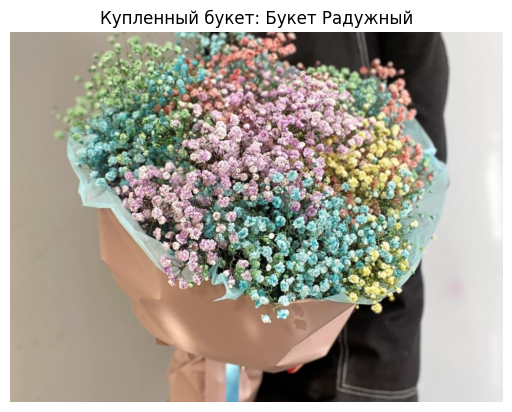

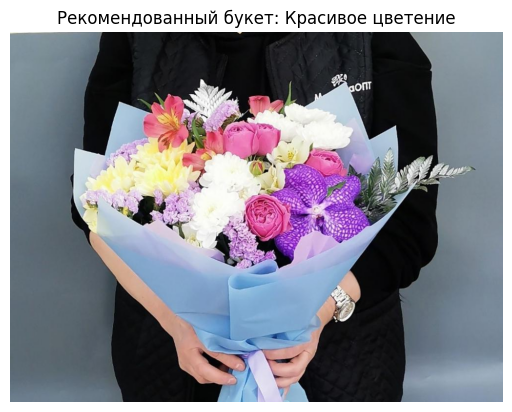

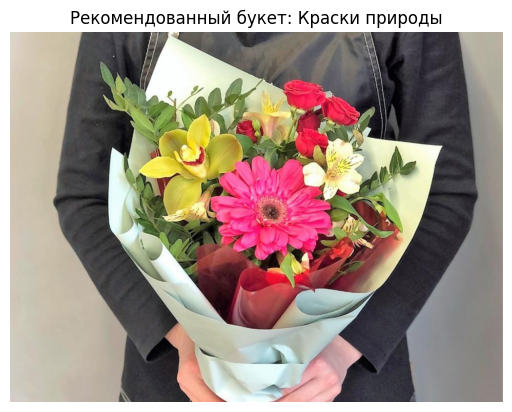

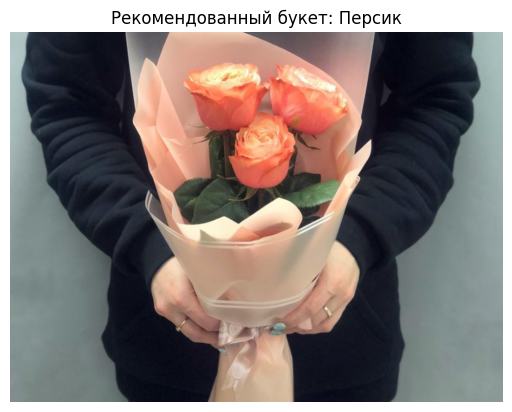

In [ ]:
#24.02. 10.27. УСПЕШНО!!!!
# Загрузка DataFrame
df_colors1 = pd.read_csv(r'C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images_unique2\orders15.csv')

# Преобразование ID заказчиков и товаров в строковый тип
df_colors1['Товар'] = df_colors1['Товар'].astype(str)
df_colors1['Заказчик'] = df_colors1['Заказчик'].astype(str)
df_colors1['filename'] = df_colors1['filename'].astype(str)

# Исключение "Нет цвета" из all_colors
df_colors1 = df_colors1[df_colors1['all_colors'] != "Нет цвета"]

# Создание матрицы сходства
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df_colors1['all_colors'])
cosine_sim = cosine_similarity(X, X)

def show_past_purchases(customer_id, df):
    # Фильтрация покупок по заказчику
    past_purchases = df[df['Заказчик'] == customer_id]

    print("Купленные букеты:")
    for _, row in past_purchases.iterrows():
        img_filename = row['filename']
        img_path = os.path.join(r'C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images_unique2', img_filename)
        try:
            img = Image.open(img_path)
            plt.figure()
            plt.imshow(img)
            plt.axis('off')
            plt.title("Купленный букет: " + row['Название товара'])
            plt.show()
        except FileNotFoundError:
            print(f"Файл {img_path} не найден.")

def recommend_for_customer(customer_id, df, cosine_sim, num_recommendations=3):
    # Исключение купленных товаров из рекомендаций
    purchased_products = set(df[df['Заказчик'] == customer_id]['Товар'])

    # Подбор уникальных рекомендаций
    recommendations = []
    for idx, score in enumerate(cosine_sim):
        if len(recommendations) >= num_recommendations:
            break
        product_id = df.iloc[idx]['Товар']
        if product_id not in purchased_products and df.iloc[idx]['filename'] != 'nan':  # Добавлена проверка на 'nan'
            img_filename = df.iloc[idx]['filename']
            if img_filename:  # Добавлена проверка на пустое значение
                img_path = os.path.join(r'C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images_unique2', img_filename)
                try:
                    img = Image.open(img_path)
                    recommendations.append(product_id)  # Добавляем ID товара в список рекомендаций
                    plt.figure()
                    plt.imshow(img)
                    plt.axis('off')
                    plt.title("Рекомендованный букет: " + df.iloc[idx]['Название товара'])
                    plt.show()
                except FileNotFoundError:
                    print(f"Файл {img_path} не найден.")

# Использование функций
customer_id_example = '866393.0'
show_past_purchases(customer_id_example, df_colors1)
recommend_for_customer(customer_id_example, df_colors1, cosine_sim, num_recommendations=3)


Купленные букеты:


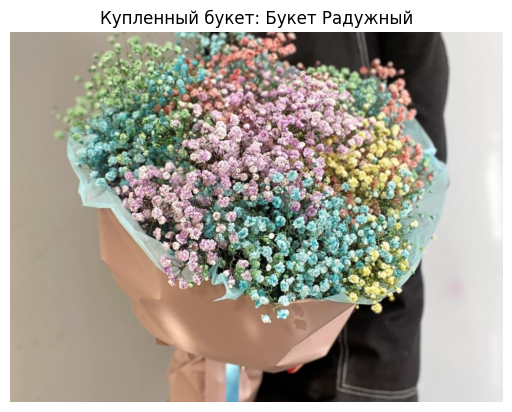

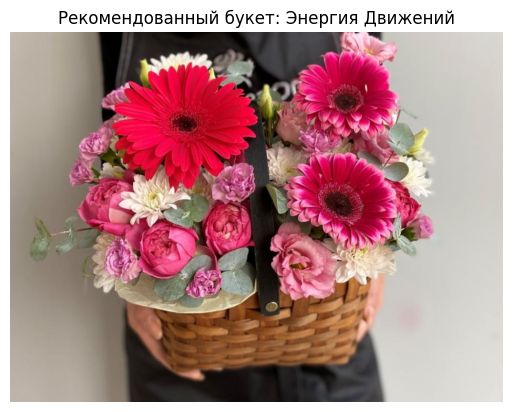

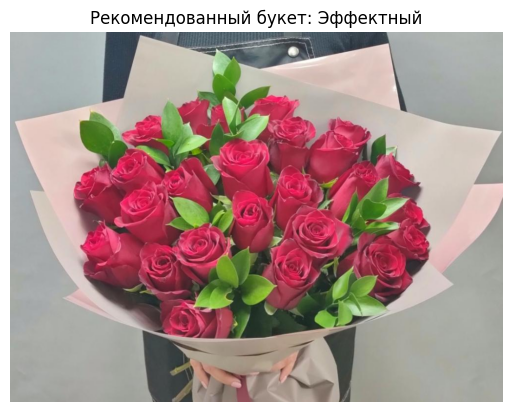

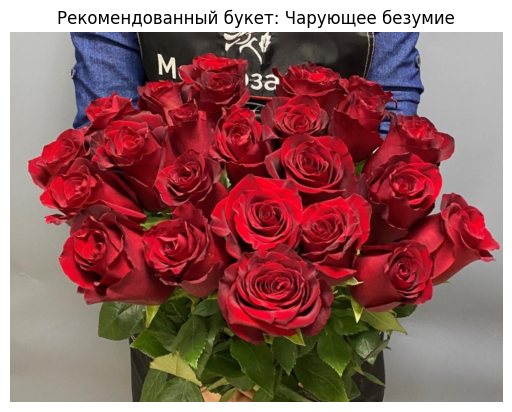

In [ ]:
# ЛОГИКА С УЧЕТОМ ЦЕНОВОЙ КАТЕГОРИИ
# Загрузка DataFrame
df_colors1 = pd.read_csv(r'C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images_unique2\orders15.csv')

# Преобразование ID заказчиков и товаров в строковый тип
df_colors1['Товар'] = df_colors1['Товар'].astype(str)
df_colors1['Заказчик'] = df_colors1['Заказчик'].astype(str)
df_colors1['filename'] = df_colors1['filename'].astype(str)

# Исключение "Нет цвета" из all_colors
df_colors1 = df_colors1[df_colors1['all_colors'] != "Нет цвета"]

# Создание матрицы сходства
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df_colors1['all_colors'])
cosine_sim = cosine_similarity(X, X)

def show_past_purchases(customer_id, df):
    # Фильтрация покупок по заказчику
    past_purchases = df[df['Заказчик'] == customer_id]

    print("Купленные букеты:")
    for _, row in past_purchases.iterrows():
        img_filename = row['filename']
        img_path = os.path.join(r'C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images_unique2', img_filename)
        try:
            img = Image.open(img_path)
            plt.figure()
            plt.imshow(img)
            plt.axis('off')
            plt.title("Купленный букет: " + row['Название товара'])
            plt.show()
        except FileNotFoundError:
            print(f"Файл {img_path} не найден.")

def recommend_for_customer(customer_id, df, cosine_sim, num_recommendations=3):
    purchased_products = df[df['Заказчик'] == customer_id]
    if purchased_products.empty:
        print(f"У заказчика с ID {customer_id} нет купленных товаров.")
        return

    # Получаем максимальную стоимость товара, купленного заказчиком
    max_price = purchased_products['Стоимость товара'].max()

    recommended = set()
    for idx, row in enumerate(cosine_sim):
        if len(recommended) >= num_recommendations:
            break
        product_id = df.iloc[idx]['Товар']
        product_price = df.iloc[idx]['Стоимость товара']
        # Проверяем, что товар не был куплен ранее и его цена равна или выше максимальной цены предыдущих покупок
        if product_id not in purchased_products['Товар'].values and product_price >= max_price:
            img_filename = df.iloc[idx]['filename']
            img_path = os.path.join(r'C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images_unique2', img_filename)
            try:
                img = Image.open(img_path)
                recommended.add(product_id)  # Добавляем ID товара в список рекомендаций
                plt.figure()
                plt.imshow(img)
                plt.axis('off')
                plt.title("Рекомендованный букет: " + df.iloc[idx]['Название товара'])
                plt.show()
            except FileNotFoundError:
                print(f"Файл {img_path} не найден.")
# Использование функций
customer_id_example = '866393.0'
show_past_purchases(customer_id_example, df_colors1)
recommend_for_customer(customer_id_example, df_colors1, cosine_sim, num_recommendations=3)


In [ ]:

import pandas as pd
from datetime import datetime

# Добавляем в датасет метрики
df = pd.read_csv(r"C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images_unique2\orders12.csv")

# Добавляем колонки с начальными значениями
df['conversion_increase'] = 0  # Начальное увеличение конверсии
df['average_check'] = 0  # Начальный средний чек
df['views_per_user'] = 0  # Начальное количество просмотров на пользователя

# Добавляем колонки с дельтами на будущую дату, например, 1 марта 2024 года
future_date = "2024-03-14"
df[f'conversion_increase_{future_date}'] = 0
df[f'average_check_{future_date}'] = 0
df[f'views_per_user_{future_date}'] = 0

# Сохраняем датасет с добавленными колонками
df.to_csv(r"C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images_unique2\orders20.csv", index=False)
df.head()

,№,Оформлен,Заказчик,Пол,Тип заказа,Время доставки,Стоимость,Статус заказа,Товар,Название товара,...,color_name5,color_result,Товар_y,all_colors,conversion_increase,average_check,views_per_user,conversion_increase_2024-03-14,average_check_2024-03-14,views_per_user_2024-03-14
0,65972.0,30.09.2023,404459.0,Мужской,Доставка,01.10.2023,3509.0,В работе,6899.0,Красивое цветение,...,Карамельно-розовый,"{'monochrome': False, 'bright': False, 'contra...",6899.jpg,Пастельно-бирюзовый Болгарская роза Пастельно-...,0,0,0,0,0,0
1,65972.0,30.09.2023,404459.0,Мужской,Доставка,01.10.2023,3509.0,В работе,128833.0,Топпер,...,Нет цвета,NaN,NaN,Нет цвета Нет цвета Нет цвета Нет цвета Нет цвета,0,0,0,0,0,0
2,65969.0,30.09.2023,179598.0,Мужской,Доставка,30.09.2023,2200.0,В работе,586.0,Краски природы,...,Бежевый,"{'monochrome': False, 'bright': False, 'contra...",586.jpg,Глубокий красно-пурпурный Зелено-бежевый Светл...,0,0,0,0,0,0
3,65962.0,29.09.2023,810193.0,Мужской,Доставка,29.09.2023,1165.0,В работе,128771.0,Персик,...,Зелено-бежевый,"{'monochrome': False, 'bright': False, 'contra...",128771.jpg,Пастельно-фиолетовый Болгарская роза Бледно-ро...,0,0,0,0,0,0
4,65954.0,29.09.2023,802444.0,Мужской,Доставка,29.09.2023,2225.0,В работе,607.0,Самой милой,...,Бледно-розовый,"{'monochrome': False, 'bright': False, 'contra...",607.jpg,Пурпурный Светлая вишня Болгарская роза Пастел...,0,0,0,0,0,0


**Мероприятия по ускорению выдачи рекомендаций на лету**

***Ограничение количества рекомендаций? чтобы не перегружать пользователя избыточной информацией и не замедлять систему. Итого 8? Или 4?***

***Асинхронная загрузка рекомендаций, чтобы пользователь мог видеть часть контента, пока остальные данные загружаются.***

***Автоматизация обработки: Если магазин продолжит присылать данные в своем формате, можно разработать скрипт  для автоматической обработки данных каждый раз при их получении прямо на сервере***

In [ ]:
# Рекомендации для корзины. Пока выводим просто названия, без изображений
import pandas as pd

def recommend_accessories(customer_id, df):
    # Преобразование идентификатора заказчика в строку, если он уже не строка
    customer_id = str(customer_id)

    # Фильтруем покупки данного заказчика
    customer_purchases = df[df['Заказчик'] == customer_id]

    # Определяем категории для рекомендаций
    target_categories = ['СОПУТСТВУЮЩИЕ ТОВАРЫ', 'ВОЗДУШНЫЕ ШАРЫ', 'ОТКРЫТКИ', 'ИГРУШКИ']

    # Фильтруем товары по заданным категориям
    accessories = df[df['Название категории'].isin(target_categories)]

    # Исключаем из рекомендаций игрушки и открытки, уже купленные данным заказчиком
    exclude_categories = ['ОТКРЫТКИ', 'ИГРУШКИ']
    exclude_items = customer_purchases[customer_purchases['Название категории'].isin(exclude_categories)]['Название товара']
    recommendations = accessories[~accessories['Название товара'].isin(exclude_items)]

    if not recommendations.empty:
        print("Рекомендации для заказчика:")
        for category in target_categories:
            category_items = recommendations[recommendations['Название категории'] == category]
            if not category_items.empty:
                # Выбираем первый товар в категории
                first_item = category_items.iloc[0]
                print(f"В категории {category}:")
                print(first_item[['Название товара', 'Название категории']])
                print("\n")
    else:
        print("Нет рекомендаций для данного заказчика.")


In [ ]:
csv_file_path = r'C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images_unique2\orders10.csv'
# Загрузка данных из CSV в DataFrame
df = pd.read_csv(csv_file_path)
test_customer_id = '947590'  # Пример идентификатора заказчика в виде строки
recommend_accessories(test_customer_id, df)

Рекомендации для заказчика:
В категории ВОЗДУШНЫЕ ШАРЫ:
Название товара       Шар  Хром 30 см
Название категории     ВОЗДУШНЫЕ ШАРЫ
Name: 18, dtype: object


В категории ОТКРЫТКИ:
Название товара       Открытка в ассортименте
Название категории                   ОТКРЫТКИ
Name: 7, dtype: object


В категории ИГРУШКИ:
Название товара       Игрушка "Собачка Чуча" 30 см
Название категории                         ИГРУШКИ
Name: 145, dtype: object




In [ ]:
# Проверка, какие букеты покупали заказчики ранее
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import ast

# Загрузка данных
data = pd.read_csv(r'C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images_unique2\orders12.csv')

# Функция для преобразования строки в список, игнорируя NaN
def to_list(s):
    if pd.isna(s):
        return None
    else:
        return np.array(ast.literal_eval(s))

# Преобразование строк цветов в списки
for i in range(1, 6):
    data[f'color{i}'] = data[f'color{i}'].apply(to_list)

# Создание новых колонок для сходства каждого товара
for i in range(1, 6):
    data[f'similarity{i}'] = np.nan

# Проходим по каждому пользователю
for customer in data['Заказчик'].unique():
    # Получаем все заказы этого пользователя
    orders = data[data['Заказчик'] == customer]

    # Если у пользователя больше одного заказа
    if len(orders) > 1:
        # Проходим по каждой паре заказов
        for i in range(len(orders) - 1):
            for j in range(i + 1, len(orders)):
                # Вычисляем косинусное сходство между цветовыми гаммами букетов
                for k in range(1, 6):
                    if orders.iloc[i][f'color{k}'] is not None and orders.iloc[j][f'color{k}'] is not None:
                        similarity = cosine_similarity([orders.iloc[i][f'color{k}'].flatten()], [orders.iloc[j][f'color{k}'].flatten()])
                        # Добавляем результат в соответствующую колонку
                        data.loc[orders.iloc[i].name, f'similarity{k}'] = similarity[0][0]
# Округление значений косинусного сходства до одного знака после запятой
for i in range(1, 6):
    data[f'similarity{i}'] = data[f'similarity{i}'].apply(lambda x: round(x, 3) if pd.notnull(x) else x)

# Сохранение обновленного датасета в новый CSV-файл
data.to_csv(r'C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images_unique2\orders_past_similarity.csv', index=False)



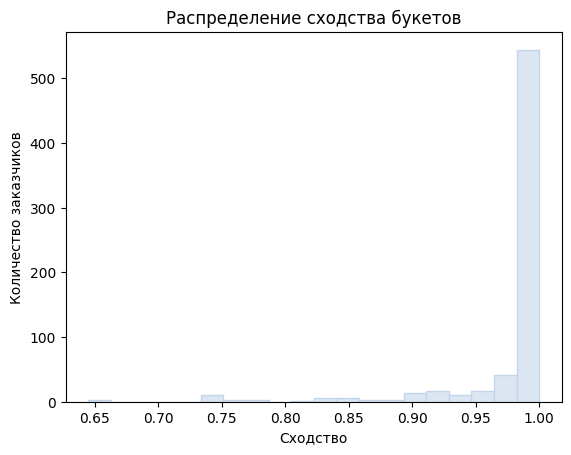

In [ ]:
# 100% сходство считать не будем, но мы видим, что основная масса находится в пределах 0,85-0,99.
# То есть, люди действительно пердпочитают схожую цветовую гамму.
import matplotlib.pyplot as plt

# Удаление NaN значений
similarity1 = data['similarity1'].dropna()

# Создание гистограммы
plt.hist(similarity1, bins=20, color='#dce6f2', edgecolor='#c3d5e8')

# Добавление заголовка и меток осей
plt.title('Распределение сходства букетов')
plt.xlabel('Сходство')
plt.ylabel('Количество заказчиков')

# Отображение гистограммы
plt.show()


In [ ]:
# ЭТО ДЛЯ СЕРВЕРА
# flowers_app.py
from fastapi import FastAPI
from typing import Optional
from pydantic import BaseModel
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from PIL import Image
import os

app = FastAPI()

class CustomerRequest(BaseModel):
    customer_id: str
    num_recommendations: Optional[int] = 3

@app.post("/recommendations/")
async def get_recommendations(request: CustomerRequest):
    customer_id = request.customer_id
    num_recommendations = request.num_recommendations

# Загрузка DataFrame с цветами и результатами
df_colors1 = pd.read_csv(r'C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images_unique2\orders12.csv')

# Исключаем покупки сопутствующих товаров (например, nan) и дубликаты
df_colors1 = df_colors1.dropna(subset=['Товар'])  # Удаляем строки, где Товар = nan
df_colors1 = df_colors1.drop_duplicates(subset=['Товар', 'Заказчик'])  # Удаляем дубликаты

# Преобразование ID товаров и заказчиков в строковый тип
df_colors1['Товар'] = df_colors1['Товар'].astype(str)
df_colors1['Заказчик'] = df_colors1['Заказчик'].astype(str)

# Создание матрицы сходства
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df_colors1['all_colors'])
cosine_sim = cosine_similarity(X, X)

def show_past_purchases(customer_id, df):
    # Исправлено: используем параметр функции `customer_id`
    past_purchases = df[df['Заказчик'] == customer_id]
    displayed_images = set()  # Для отслеживания отображенных изображений
    for i, row in past_purchases.iterrows():
        img_filename = row['filename']
        if img_filename in displayed_images:
            continue
        displayed_images.add(img_filename)
        img_path = os.path.join(r'C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images_unique2', img_filename)
        if os.path.exists(img_path):
            img = Image.open(img_path)
            plt.figure()
            plt.imshow(img)
            plt.axis('off')
            plt.title('Купленный букет')
            plt.show()

def recommend_for_customer(customer_id, df, cosine_sim, num_recommendations=3):
    purchased_products = df[df['Заказчик'] == customer_id]['Товар'].unique()
    if len(purchased_products) == 0:
        print(f"У заказчика с ID {customer_id} нет купленных товаров.")
        return
    for product_id in purchased_products:
        # Исправлено: рекомендуем товары для каждого купленного продукта отдельно
        recommend_products(product_id, df, cosine_sim, num_recommendations)

# Пример использования
df_colors1['Товар'] = df_colors1['Товар'].astype(str)
df_colors1['Заказчик'] = df_colors1['Заказчик'].astype(str)

customer_id_example = '866393.0'  # Пример ID заказчика
show_past_purchases(customer_id_example, df_colors1)
recommend_for_customer(customer_id_example, df_colors1, cosine_sim, num_recommendations=2)
    # Mock response, replace with actual recommendation logic
    recommendations = [{"product_id": "12345", "similarity_score": 0.95}, {"product_id": "67890", "similarity_score": 0.93}]

    return {"customer_id": customer_id, "recommendations": recommendations}

if __name__ == "__main__":
    import uvicorn
    uvicorn.run(app, host="127.0.0.1", port=8000)


In [ ]:
''''''# requirements.txt
''''''fastapi==0.68.0
uvicorn==0.15.0
pandas==1.3.3
pydantic==1.8.2
Pillow==8.3.1
matplotlib==3.4.2
numpy==1.21.2
scikit-learn==0.24.2'''

In [ ]:
@app.post("/recommendations/", response_model=RecommendationsResponse)
async def get_recommendations(request: CustomerRequest):
    df_colors1 = pd.read_csv(r'C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images_unique2\orders12.csv')
    df_colors1 = df_colors1[df_colors1['Название категории'].notna() & ~df_colors1['Название категории'].isin(['СОПУТСТВУЮЩИЕ ТОВАРЫ', 'ОТКРЫТКИ', 'ВОЗДУШНЫЕ ШАРЫ', 'СОБЕРИ БУКЕТ', 'ИГРУШКИ'])]
    df_colors1['Товар'] = df_colors1['Товар'].astype(str)
    df_colors1['Заказчик'] = df_colors1['Заказчик'].astype(str)
    df_colors1 = df_colors1.drop_duplicates(subset=['Товар', 'Заказчик'])  # Удаляем дубликаты

# Создание матрицы сходства
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df_colors1['all_colors'])
cosine_sim = cosine_similarity(X, X)

def show_past_purchases(customer_id, df):
    # Исправлено: используем параметр функции `customer_id`
    past_purchases = df[df['Заказчик'] == customer_id]
    displayed_images = set()  # Для отслеживания отображенных изображений
    for i, row in past_purchases.iterrows():
        img_filename = row['filename']
        if img_filename in displayed_images:
            continue
        displayed_images.add(img_filename)
        img_path = os.path.join(r'C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images_unique2', img_filename)
        if os.path.exists(img_path):
            img = Image.open(img_path)
            plt.figure()
            plt.imshow(img)
            plt.axis('off')
            plt.title('Купленный букет')
            plt.show()

def recommend_for_customer(customer_id, df, cosine_sim, num_recommendations=3):
    purchased_products = df[df['Заказчик'] == customer_id]['Товар'].unique()
    if len(purchased_products) == 0:
        print(f"У заказчика с ID {customer_id} нет купленных товаров.")
        return
    for product_id in purchased_products:
        # Исправлено: рекомендуем товары для каждого купленного продукта отдельно
        recommend_products(product_id, df, cosine_sim, num_recommendations)

# Пример использования
df_colors1['Товар'] = df_colors1['Товар'].astype(str)
df_colors1['Заказчик'] = df_colors1['Заказчик'].astype(str)

customer_id_example = '866393.0'  # Пример ID заказчика
show_past_purchases(customer_id_example, df_colors1)
recommend_for_customer(customer_id_example, df_colors1, cosine_sim, num_recommendations=2)
    # Mock response, replace with actual recommendation logic
    recommendations = [{"product_id": "12345", "similarity_score": 0.95}, {"product_id": "67890", "similarity_score": 0.93}]

    return {"customer_id": customer_id, "recommendations": recommendations}

if __name__ == "__main__":
    import uvicorn
    uvicorn.run(app, host="127.0.0.1", port=8000)



In [ ]:
'''''# рекомендациb
    recommendations = [Recommendation(product_id="123456", similarity_score=0.9, image_url="http://example.com/image1.jpg"),
                       Recommendation(product_id="456", similarity_score=0.8, image_url="http://example.com/image2.jpg")]

    return RecommendationsResponse(customer_id=request.customer_id, recommendations=recommendations)'''''


In [ ]:
''''''uvicorn main:app --reload


In [ ]:
# Привящка к просмотрам в яндекс-метрике
import requests

def send_event_to_metrica(counter_id, client_id, events):
    API_URL = "https://api-metrica.yandex.net/management/v1/counter/{counter_id}/logrequest"
    headers = {
        "Authorization": "OAuth <КЛЮЧ_API>"
    }
    data = {
        "requests": [{
            "client_id": client_id,
            "events": events
        }]
    }
    response = requests.post(API_URL.format(counter_id=counter_id), headers=headers, json=data)
    return response.json()


In [ ]:
# Шаблон для отправки по почте отчета о просмотрах для корректировки рекомендаций.
'''''import smtplib
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart

def send_email(subject, body, to_addr, from_addr, smtp_server, smtp_port, login, password):
    msg = MIMEMultipart()
    msg['From'] = from_addr
    msg['To'] = to_addr
    msg['Subject'] = subject

    msg.attach(MIMEText(body, 'plain'))

    server = smtplib.SMTP(smtp_server, smtp_port)
    server.starttls()
    server.login(login, password)
    text = msg.as_string()
    server.sendmail(from_addr, to_addr, text)
    server.quit()

# Замените следующие значения на свои
subject = "Еженедельный отчет о рекомендациях"
body = "Здесь ваш отчет..."
to_addr = "example@example.com"
from_addr = "your_email@example.com"
smtp_server = "smtp.example.com"
smtp_port = 587
login = "your_email@example.com"
password = "your_password"

# Вызов функции для отправки отчета
send_email(subject, body, to_addr, from_addr, smtp_server, smtp_port, login, password)


In [ ]:
# закачка данных в базу данных sqlite
'''''import sqlite3
from datetime import datetime
import pandas as pd
import sqlite3

# Загрузка данных из CSV
df = pd.read_csv(r'C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images_unique2\orders12.csv')

# Подключение к базе данных SQLite (будет создан файл базы данных, если он не существует)
conn = sqlite3.connect(r'C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images_unique2\flowers.db')

# Создание таблицы
conn.execute('''CREATE TABLE IF NOT EXISTS orders (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    order_date TEXT,
    customer_id TEXT,
    gender TEXT,
    order_type TEXT,
    delivery_time TEXT,
    total_cost REAL,
    order_status TEXT,
    product_id TEXT,
    product_name TEXT,
    category_name TEXT,
    image_link TEXT,
    product_cost REAL,
    quantity INTEGER,
    filename TEXT,
    color1 TEXT,
    color_name1 TEXT,
    color2 TEXT,
    color_name2 TEXT,
    color3 TEXT,
    color_name3 TEXT,
    color4 TEXT,
    color_name4 TEXT,
    color5 TEXT,
    color_name5 TEXT,
    color_result TEXT,
    all_colors TEXT
)''')

# Преобразование данных для вставки в таблицу
data_to_insert = df.to_records(index=False)

# Вставка данных
conn.executemany('''
INSERT INTO orders (order_date, customer_id, gender, order_type, delivery_time, total_cost, order_status, product_id, product_name, category_name, image_link, product_cost, quantity, filename, color1, color_name1, color2, color_name2, color3, color_name3, color4, color_name4, color5, color_name5, color_result, all_colors)
VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
''', data_to_insert)

# Закрытие соединения с базой данных
conn.commit()
conn.close()

print("Данные успешно загружены в базу данных.")



In [ ]:
from lightfm import LightFM
from lightfm.data import Dataset

# Создание датасета
dataset = Dataset()
dataset.fit(users=..., items=..., item_features=...)

# Подготовка матриц взаимодействий и признаков
(interactions, weights) = dataset.build_interactions(...)
item_features = dataset.build_item_features(..., normalize=False)

# Создание и обучение модели
model = LightFM(loss='warp')
model.fit(interactions, item_features=item_features, epochs=20)


In [ ]:
# Установка LightFM, если она еще не установлена
# pip install lightfm

from lightfm import LightFM
from lightfm.data import Dataset
import numpy as np
import pandas as pd

# Предположим, df — это ваш DataFrame с данными о покупках и фичами букетов
# Пример данных: customer_id, product_id, features (векторизированные)

# Создаем объект Dataset, который будет использоваться для формирования внутреннего представления данных
dataset = Dataset()

# Добавляем пользователей и товары в датасет
dataset.fit(
    (row['customer_id'] for index, row in df.iterrows()),
    (row['product_id'] for index, row in df.iterrows())
)

# Теперь добавляем фичи товаров
dataset.fit_partial(
    items=(row['product_id'] for index, row in df.iterrows()),
    item_features=(row['features'] for index, row in df.iterrows())
)

# Создаем взаимодействия и фичи товаров в виде матриц
(interactions, weights) = dataset.build_interactions(((row['customer_id'], row['product_id']) for index, row in df.iterrows()))
item_features = dataset.build_item_features(((row['product_id'], [row['features']]) for index, row in df.iterrows()))

# Инициализация модели LightFM
model = LightFM(loss='warp')

# Обучение модели
model.fit(interactions, item_features=item_features, sample_weight=weights, epochs=10)

# Для получения рекомендаций можно использовать метод model.predict или model.predict_rank


In [ ]:
# Для пользователя X предсказываем рейтинги всех товаров
user_id = dataset.mapping()[0]['user_id']
scores = model.predict(user_id, np.arange(n_items), item_features=item_features)

# Сортировка товаров по предсказанным рейтингам
recommended_items = np.argsort(-scores)


In [ ]:
import requests
# запрос к серверу на получение датасета
'''''url = "https://admin2.onedelivery.su/ajax/orders_export_ai.php"
headers = {
    "token": "vjgds67673vvgds872kjdsogsd53"
}
params = {
    "min_timestamp": "12.02.2024",
    "max_timestamp": "14.02.2024",
    "id_company": "1"
}

response = requests.get(url, headers=headers, params=params)

# Для сохранения полученного csv файла
with open('path_to_save_file.csv', 'w') as file:
    file.write(response.text)''''''
